In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the data and drop the first row if it contains unwanted headers or metadata
df = pd.read_excel("Drainage_15min_SE15Y.xlsx").drop(index=0)
df.head()

,date,Observation,Green LAI,Simulation_Final,Rain,Drain_Coe1
1,2013-01-01 00:15:00,NaN,0.3,0.299723,0.3,0.299747
2,2013-01-01 00:30:00,NaN,0.5,0.499721,0.5,0.499743
3,2013-01-01 00:45:00,NaN,0.4,0.399815,0.4,0.399843
4,2013-01-01 01:00:00,NaN,0.3,0.299827,0.3,0.299858
5,2013-01-01 01:15:00,NaN,0.3,0.299744,0.3,0.299770


In [7]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [12]:
# Drop rows with missing values in any of the relevant columns
df = df.dropna(subset=['Observation', 'Simulation_Final'])
df.head()

,date,Observation,Green LAI,Simulation_Final,Rain,Drain_Coe1
1000,2013-01-11 10:00:00,0.00,0.0,0.0,0.0,0.0
1001,2013-01-11 10:15:00,0.00,0.0,0.0,0.0,0.0
1002,2013-01-11 10:30:00,0.00,0.0,0.0,0.0,0.0
1003,2013-01-11 10:45:00,0.01,0.0,0.0,0.0,0.0
1004,2013-01-11 11:00:00,0.00,0.0,0.0,0.0,0.0


In [18]:
df.groupby(df['date'].dt.date)[['Observation', 'Simulation_Final']].sum().reset_index(drop=True)

,date,Observation,Simulation_Final
0,2013-01-11,0.34,0.277928
1,2013-01-12,1.64,2.148338
2,2013-01-13,0.48,0.389006
3,2013-01-14,0.34,0.112014
4,2013-01-15,6.70,0.000000
...,...,...,...
296,2013-12-27,12.57,15.761690
297,2013-12-28,8.60,8.176917
298,2013-12-29,0.26,0.067740
299,2013-12-30,0.96,1.400100


In [8]:
# Calculate the difference
df['Difference'] = df['Simulation_Final'] - df['Observation'] 

df.to_excel("Drainage_Estimation Error.xlsx")

C:\Users\Maung Maung\AppData\Local\Temp\ipykernel_14220\3587763897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference'] = df['Simulation_Final'] - df['Observation']


C:\Users\Maung Maung\AppData\Local\Temp\ipykernel_14220\64151934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Difference'] = df['Simulation_Final'] - df['Observation']


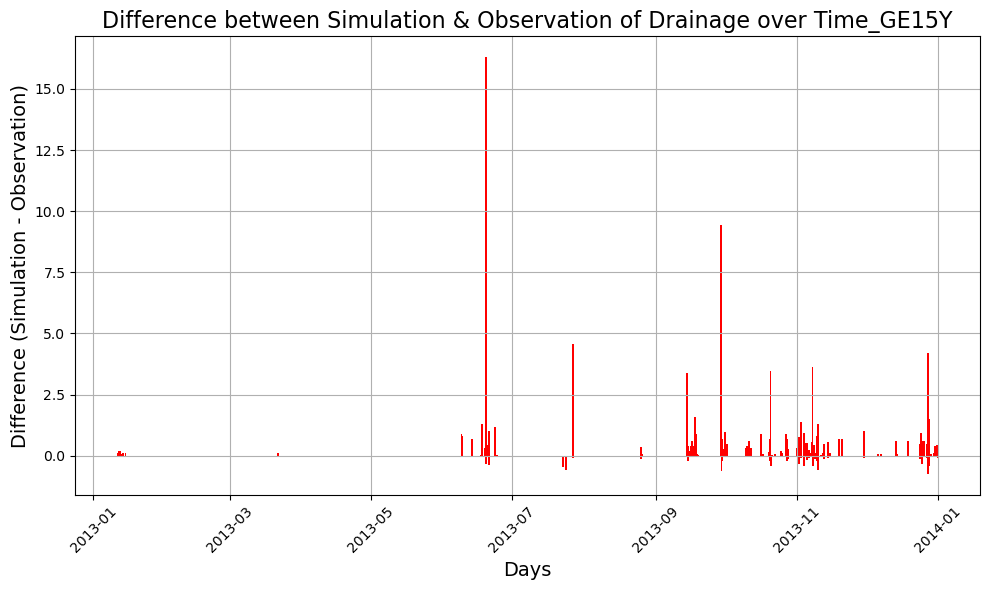

In [4]:
# Create a bar chart of the differences
plt.figure(figsize=(10, 6))
plt.bar(df['date'], df['Difference'], color='red')
plt.xlabel('Days',fontsize= 14 )
plt.ylabel('Difference (Simulation - Observation)',fontsize= 14)
plt.title('Difference between Simulation & Observation of Drainage over Time_GE15Y',fontsize= 16)

# Modify the x-ticks and y-ticks font properties
plt.xticks(rotation=45)


plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()